In [14]:
#9.1
#Harmonic oscillator
#First four states are given
#The energy are calculated and the 1/2 part of each energy part is absorbed



%matplotlib

from pylab import *
from scipy.integrate import odeint
from scipy.optimize import brentq
import matplotlib as plt
 
def V(x):
   
    if abs(x)< L:
        return 0.5*k*x**2
    else:
        return 0.5*k*L**2
         
def SE(psi, x):
  
    state0 = psi[1]
    state1 = (2.0*m/h**2)*(V(x) - E)*psi[0]
    return array([state0, state1])
     
def Wave_function(energy):
    """
    Calculates wave function psi for the given value 
    of energy E and returns value at point b
    """
    global psi
    global E
    E = energy
    psi = odeint(SE, psi_init, x)
    return psi[-1,0]
 
def find_all_zeroes(x,y):
    all_zeroes = []   
    s = sign(y)
    for i in range(len(y)-1):
        if s[i]+s[i+1] == 0:
            zero = brentq(Wave_function, x[i], x[i+1])
            all_zeroes.append(zero)
    return all_zeroes
     
 
     
def find_analytic_energies(en):

    E_max = max(en)
    print('Allowed energies of HO:')
    i = 0
    while((i+0.5)*h*w < E_max):
        i+=1
     
     
     
N = 1000                  # number of points to take on x-axis    
psi = np.zeros([N,2])     # Wave function values and its derivative (psi and psi')
psi_init = array([.001,0])# Wave function initial states
E = 0.0                   # global variable Energy  needed for Sch.Eq, changed in function "Wave function"
b = 2                     # point outside of HO where we need to check if the function diverges
x = linspace(-b, b, N)    # x-axis
k = 100                   # spring constant 
m = 1                     # mass of the body
w = sqrt(k/m)             # classical HO frequency 
h = 1                     # normalized Planck constant
L = 1                     # size of the HO
                
def main():    
    # main program        
     
    en = linspace(0, 0.5*k*L**2, 50)   # vector of energies where we look for the stable states
     
    psi_end = []      # vector of wave function at x = b for all of the energies in en
    for e1 in en:
        psi_end.append(Wave_function(e1))     # for each energy e1 find the the psi(x) outside of HO        
         
    E_zeroes = find_all_zeroes(en, psi_end)   # now find the energies where psi(b) = 0 
     
    #Plot wave function values at b vs energy vector
    figure()
    plot(en,psi_end)
    title('Values of the $\Psi(b)$ vs. Energy')
    xlabel('Energy, $E$')
    ylabel('$\Psi(x = b)$', rotation='horizontal')
    for E in E_zeroes:
        plot(E, [0], 'go')
        annotate("E = %.2f" %E, xy = (E, 0), xytext=(E, 5))
    grid()
        
    for En in E_zeroes:
        print ("%.2f " %En)
         
    # Print energies of each bound state from the analytical model
    find_analytic_energies(en)   
 
    # Plot the wave function for 1st 4 eigenstates
    figure(2)
    for i in range(4):                                                 # For each of 1st 4 allowed energies
        Wave_function(E_zeroes[i])                                     # find the wave function psi(x) 
        plot(x, 100**i*psi[:,0]**2, label="E = %.2f" %E_zeroes[i])      # and plot it scaled for comparison    
    legend(loc="upper right")
    title('Wave function')
    xlabel('x, $x/L$')
    ylabel('$|\Psi(x)|^2$', rotation='horizontal', fontsize = 20)    
    grid()       
     
    # Plot the wave function for the last eigenstate
    figure(3)
    Wave_function(E_zeroes[-1])                                        # Find Wave function for the last allowed energy
    plot(x, psi[:,0]**2, label="E = %.2f" %E_zeroes[-1])    
    legend(loc="upper right")
    title('Wave function')
    xlabel('x, $x/L$')
    ylabel('$|\Psi(x)|^2$', rotation='horizontal', fontsize = 20)    
    grid()    
     
if __name__ == "__main__":
    main()

Using matplotlib backend: Qt5Agg
5.00 
15.00 
24.99 
34.90 
44.37 
Allowed energies of HO:


In [15]:
#9.1
#Harmonic oscillator, exact solution

#Known Solution

import numpy as np
import matplotlib.pyplot as plt
import math as mat

k=100
m=1
h=1
c=mat.sqrt(m*w/h)
w=mat.sqrt(k/m)

b=2
N = 1000
x = np.linspace(-b, b, N)


def Hn(x,n):
    if n == 0:
        H = 1
    if n == 1:
        H = 2*c*x
    if n == 2:
        H = 4*(c*x)**2 - 2
    if n == 3:
        H = 8*(c*x)**3 - 12*(c*x)
    return H
        
e = mat.exp(1)


print("Energy Levels are: ")
n = 0 # n is the modes of oscillation 
while n<5:
    psi = (Hn(x,n))*(e**((-c**2*x**2)/2))*(1/mat.sqrt(2**n*mat.factorial(n)))*(m*w/(mat.pi*h))**(0.25)
    plt.plot(x,psi)
    E = h*w*(n+1/2)
    print(E)
    n = n + 1

plt.show()

Energy Levels are: 
5.0
15.0
25.0
35.0


UnboundLocalError: local variable 'H' referenced before assignment

In [ ]:
#9.7

#Finite matrix solution of harmonic oscilltor
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return x**2

N = 1001
a = 5
x = np.linspace(-a,a,N)
h = x[1]-x[0]

T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
            
            
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
            

H = -T/(2*h**2) + V
#print(H.shape)


val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:5]  #Number of eigen values you want
energies=(val[z]/val[z][0])
print(energies)
#print(val)

for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,-y, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('Normalized wavefunctions',size=14)
plt.show()


[0.30842488 1.23369649 2.77580569 4.93473726]
[ 1.          3.99999013  8.99994078 15.99980261]


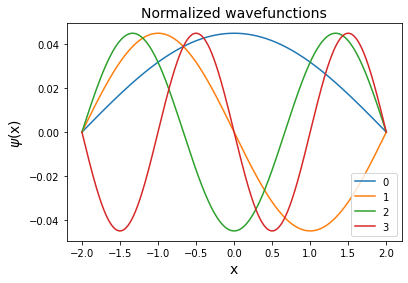

In [17]:
#9.9

#Infinite square well problem

import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return 0

N = 1001 #My system is not giving me resulsts if N = 5000 as siad in the question. A more powerful system can give the outcome
a = 2
x = np.linspace(-a,a,N)
h = x[1]-x[0]

T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
            
            
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
            

H = -T/(2*h**2) + V


val,vec=np.linalg.eig(H)
#print(val)
z = np.argsort(val)
#print(z)
z = z[0:4]
energies=(val[z]/val[z][0])
print(val[z])
print(energies)


for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,-y, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('Normalized wavefunctions',size=14)
plt.show()


In [18]:
#11.2

#Gaussian wavepacket 
#Time evolution

%matplotlib
from math import sin, pi,cos
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.cm as cm
from matplotlib.widgets import Slider
from matplotlib.widgets import CheckButtons



fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

plt.subplots_adjust(left=0.12, bottom=0.35)

k0 = 2 
a = 1 
srx = 50 

x = np.linspace(-srx/3, 2*srx/3, srx*20) #absisse de la simulation
x2 = np.linspace(0, 100, 1000)#absisse de l'espace des fréquences




alpha = 1 ## alpha = hbar/m => v = alpha*k
is_color = False 


def psi(t): 
    global x
    v = alpha*k0
    w = (a**4 + ((alpha*t)**2)/4)
    wComplex = a**2 + 1j*alpha*t/2
    omega = (k0**2)*alpha/2
    probCompl = np.exp(1j*(k0*x - t*omega))*((pi/wComplex)**0.5)*np.exp(-((x - v*t)**2)/(4*wComplex))
    return probCompl


#-- Creation of sliders --



ax_a = plt.axes([0.1, 0.05, 0.8, 0.03])
a_slider = Slider(ax_a, '$t$', 0, 20, valinit=0) 
a_slider.label.set_size(20)

ax_b = plt.axes([0.1, 0.15, 0.8, 0.03])
b_slider = Slider(ax_b, '$a$', 0.01, 5, valinit=a) 
b_slider.label.set_size(20)


ax_c = plt.axes([0.1, 0.25, 0.8, 0.03])
c_slider = Slider(ax_c, '$k_0$', 1, 15, valinit=k0)
c_slider.label.set_size(20)


rax = plt.axes([0.01, 0.45, 0.08, 0.1]) 
check = CheckButtons(rax, [''], [False])



def update_phase(val_):
    global a
    a = b_slider.val
    y = np.exp(- (a**2)*(k0-x2)**2) 
    ax1.clear()
    ax1.set_title('Fourier Transformation')
    ax1.plot(x2, y)

    fig.canvas.draw_idle()
    update_temps(0) 

def update_temps(val_): 

    probCompl = psi(a_slider.val)
    ax2.clear()
    ax2.set_xlim([-srx/3,2*srx/3])
    ax2.set_ylim([-4, 4])
    ax2.set_title('Time Evolution')

    if(is_color):
        X = np.array([x,x])
        y0 = np.zeros(len(x))
        y = [abs(i) for i in probCompl]
        Y = np.array([y0,y])
        Z = np.array([probCompl,probCompl])
        C = np.angle(Z)
        ax2.pcolormesh(X, Y, C, cmap=cm.hsv, vmin=-np.pi, vmax=np.pi)
        ax2.plot(x, np.abs(probCompl), label = '$|\psi|$', color='black')

    else: 
        ax2.plot(x, np.real(probCompl), label = '$\operatorname{Re}(\psi)$')
        ax2.plot(x, np.imag(probCompl), label = '$\operatorname{Im}(\psi)$')
        ax2.plot(x, np.absolute(probCompl)**2, label = '$\psi \psi^{\dag} $')
    
    ax2.legend(fontsize=15)
    fig.canvas.draw_idle()

def update_k(val_): 
    global k0
    k0 = c_slider.val
    update_phase(0)
    update_temps(0)

def on_check(label): 
    global is_color
    is_color = not is_color
    update_temps(0)


update_phase(0) 


a_slider.on_changed(update_temps)
b_slider.on_changed(update_phase)
c_slider.on_changed(update_k)

check.on_clicked(on_check)

plt.show()



Using matplotlib backend: Qt5Agg


In [ ]:
#11.2 
#Gaussian wavefunction 
#Nyquist conditions

import numpy as np
import matplotlib.pyplot as plt
import math as mat

x_o = 25
k_o = 2
sigma = 2
ep = 10**(-10)

g=(1/(mat.sqrt(2)*sigma))*(mat.log((sigma/ep)*(mat.sqrt(2/mat.pi))))
d = mat.pi/(k_o)

print(d)
